In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Дата сет
ссылка на датасет https://www.kaggle.com/datasets/arushchillar/disneyland-reviews.
Датасет представляет из себя отзывы об Диснейленде в разных странах. В этом дата сете есть текстовые данные которые хранятся в ключе Review_Text, а так же мы можем определить был ли отзыв положительным или отрицательным взяв данные рейтинга. Если рейтинг составляет 4 или больше то он является положительным либо если он меньше 4 отрицательным. Остальные данные просто отбрасываются. Дата сет состоит из 42 тысяч отзывов.

In [2]:
df = pd.read_csv('archive/DisneylandReviews.csv', encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
df.keys()

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [5]:
# создаю на основе рейтинга является ли отзыв положительным либо же отрицательным
df['target'] = df['Rating'].apply(lambda x: 'neg' if x <= 3 else 'pos') 

In [6]:
df['target']

0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
42651    pos
42652    pos
42653    pos
42654    pos
42655    pos
Name: target, Length: 42656, dtype: object

In [7]:
# можно увидеть что большая часть отзывов являются положительными
review_counts = df['target'].value_counts()
review_counts

target
pos    33921
neg     8735
Name: count, dtype: int64

In [8]:
# удаляю не нужные данные
df.drop(columns=['Review_ID'], inplace=True)
df.drop(columns=['Rating'], inplace=True)
df.drop(columns=['Year_Month'], inplace=True)
df.drop(columns=['Reviewer_Location'], inplace=True)
df.drop(columns=['Branch'], inplace=True)

In [9]:
df.keys()

Index(['Review_Text', 'target'], dtype='object')

In [10]:
text_train, text_test, y_train, y_test = train_test_split(df['Review_Text'], df['target'], test_size=0.2, random_state=42)

In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train:\n{}'.format(repr(X_train)))

X_train:
<34124x38070 sparse matrix of type '<class 'numpy.int64'>'
	with 2708439 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names_out()
print('Количество признаков: {}'.format(len(feature_names)))
print('Первые 20 признаков: {}'.format(feature_names[:20]))
print('Признаки с 1000 до 1020: {}'.format(feature_names[1000:1020]))

Количество признаков: 38070
Первые 20 признаков: ['00' '000' '0000' '0000hrs' '0000s' '000km' '000s' '000th' '0010' '005'
 '00am' '00euros' '00h' '00h30' '00h40' '00h45' '00hrs' '00if' '00in'
 '00p']
Признаки с 1000 до 1020: ['2x' '2xhotdog' '2y' '2year' '2years' '2yo' '2yr' '2yrs' '30' '300'
 '3000' '300aud' '300euros' '300hkd' '303' '305' '306' '308' '30am'
 '30ampluto']


In [13]:
scores = cross_val_score(LogisticRegression(max_iter = 3000), X_train, y_train, cv = 5)
print("Средняя правильность перекрестной проверки: {}".format(np.mean(scores)))

Средняя правильность перекрестной проверки: 0.8810807879107996


In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрестной проверки: {:.2f}'.format(grid.best_score_))
print('Наилучшее параметры: ', grid.best_params_)

Наилучшее значение перекрестной проверки: 0.89
Наилучшее параметры:  {'C': 0.1}


In [15]:
vect = CountVectorizer(min_df=10).fit(text_train)
X_train = vect.transform(text_train)
print("X_train c min_df=10:\n {}".format(repr(X_train)))

X_train c min_df=10:
 <34124x8053 sparse matrix of type '<class 'numpy.int64'>'
	with 2646245 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names_out()
print('Количество признаков: {}'.format(len(feature_names)))
print('Первые 20 признаков: {}'.format(feature_names[:20]))
print('Признаки с 1000 до 1020: {}'.format(feature_names[1000:1020]))
# видно что слова стали более качественными

Количество признаков: 8053
Первые 20 признаков: ['00' '000' '00am' '00pm' '01' '05' '06' '07' '08' '0800' '09' '10' '100'
 '1000' '100hkd' '101' '1030' '105' '10am' '10min']
Признаки с 1000 до 1020: ['bizarre' 'black' 'blackout' 'blackpool' 'blah' 'blame' 'bland' 'blank'
 'blanket' 'blankets' 'blast' 'blaster' 'blasters' 'blasting' 'blatant'
 'blatantly' 'blazing' 'blend' 'bless' 'blessed']


In [17]:
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрестной проверки: {:.2f}'.format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.89


# Стоп-слова
В нашем случае признаков более 8 тысяч и вряд-ли оно сильно поможет улучшить результат, но мы попробуем

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('Количество стоп-слов: {}'.format(len(ENGLISH_STOP_WORDS)))
print('Количество стоп-слов: {}'.format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Количество стоп-слов: ['one', 'without', 'he', 'she', 'throughout', 'onto', 'forty', 'during', 'his', 'go', 'nowhere', 'couldnt', 'upon', 'everyone', 'not', 'all', 'everywhere', 'on', 'amoungst', 'anyone', 'further', 'but', 'any', 'nor', 'nothing', 'about', 'show', 'move', 'neither', 'as', 'put', 'whence']


In [19]:
vect = CountVectorizer(min_df=10, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов: \n{}".format(repr(X_train)))

X_train с использованием стоп-слов: 
<34124x7758 sparse matrix of type '<class 'numpy.int64'>'
	with 1559783 stored elements in Compressed Sparse Row format>


In [20]:
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрестной проверки: {:.2f}'.format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.88


In [21]:
vect = CountVectorizer(min_df=100).fit(text_train)
X_train = vect.transform(text_train)
print("X_train c min_df=10:\n {}".format(repr(X_train)))

X_train c min_df=10:
 <34124x2352 sparse matrix of type '<class 'numpy.int64'>'
	with 2467692 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Наилучшее значение перекрестной проверки: {:.2f}'.format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.88


Как и ожидалось результат не сильно улучшился

# Масштабирование данных с помощью tf-idf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None, stop_words='english'), LogisticRegression(max_iter=3000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print('Наилучшее значение перекрестной проверки: {:.2f}'.format(grid.best_score_))


Наилучшее значение перекрестной проверки: 0.88


In [56]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = vectorizer.get_feature_names_out()
X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
print("Признаки с наименьшими значениями tfidf: \n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \n {}".format(feature_names[sorted_by_tfidf[-20:]]))



Признаки с наименьшими значениями tfidf: 
 ['exhausting' 'tasty' 'frequent' 'inner' 'pleasure' 'forgot' 'adds'
 'equally' 'amazingly' 'spare' 'lastly' '55' 'goodness' 'zero'
 'adrenaline' 'tough' 'keen' 'tow' 'mile' 'unbearable']
Признаки с наибольшими значениями tfidf: 
 ['room' 'fast' 'got' 'actions' 'ring' 'dlp' 'btm' 'wheelchair' 'tour' 'dh'
 'dd' 'stroller' 'line' 'dl' 'wdw' 'lucas' 'ride' 'headed' 'fit' 'fat']


# Исследование коэффициентов модели

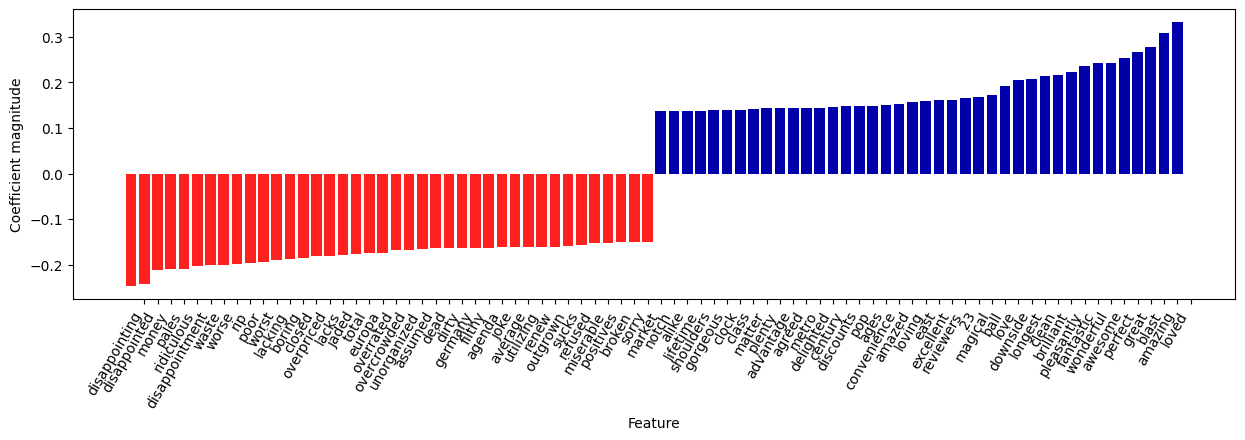

In [61]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)
print("Здесь показаны самые наиболее важные признаки с масштабированием tf-idf с юниграммой")

In [ ]:

# здесь нету ошибок, но на моем потейто компьютере я не смог дождаться результата(слишком много данных)
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

param_grid = {'logisticregression__C': [0.001, 6.01, 6.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

In [ ]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']

feature_names = np.array(vect.get_feature_names())

goef = grid.best_estinator_.named_stepsl 'logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

# Вывод

В ходе моей работы с текстовыми данными в рамках данной лабораторной, я скачал дата сет с текстовым признаком данных. Используя разные алгоритмы и подходы я смог научиться работать с текстами.

Я использовал метод TF-IDF для оценки важности слов в текстах и их контексте в коллекции документов. 

Применение списка стоп-слов в седьмой лабораторной помогло повысить точность анализа текстов, исключив распространённые, но не информативные слова. 

Исследование коэффициентов модели позволило мне определить, какие слова или характеристики оказывают наибольшее влияние на целевую переменную.

Кроме того, я пришёл к выводу о необходимости проведения дополнительных экспериментов, оптимизации параметров и тщательного анализа результатов для достижения более точных и интерпретируемых моделей.
